In [40]:
using RHEOS
using PyPlot

# Checking if RMC and RM have description field

In [41]:
spring = Spring


Model name: spring

Free parameters: k

                ___╱╲  ╱╲  ╱╲  ________
                     ╲╱  ╲╱  ╲╱  k
                

In [42]:
maxwell = RheoModel(Maxwell, k = 4, η = 5)


Model: maxwell

Parameter values: (η = 5.0, k = 4.0) 

                ___
            _____| |________╱╲  ╱╲  ╱╲  ___
                _|_|          ╲╱  ╲╱  ╲╱
                  η                  k
               

In [43]:
eval(maxwell.description.components[2][1]).params

1-element Array{Symbol,1}:
 :k

#  Test decompose function for Dashpot

In [44]:
Dashpot_model=RheoModel(Dashpot, η=2)

datat=timeline(t_start=0, t_end=10.0, step=0.02);

# dstep=stressfunction(datat, hstep(offset=0.1, amp=0.9));
dstep = strainfunction(datat,ramp(offset=2.0,gradient=0.8));
# dstep = stressfunction(datat,hstep(offset=5.0,amp=5));

data=modelpredict(dstep, Dashpot_model);

In [45]:
output = decompose(Dashpot_model, data);
# keys(output)

In [46]:
output

(data = ,)

t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
σ =	-2.8872847675331055e-16	2.8872847675331055e-16	1.4436423837665528e-16	1.4436423837665528e-16	2.8872847675331055e-16	2.8872847675331055e-16	2.8872847675331055e-16	2.8872847675331055e-16	5.774569535066211e-16	5.774569535066211e-16	...


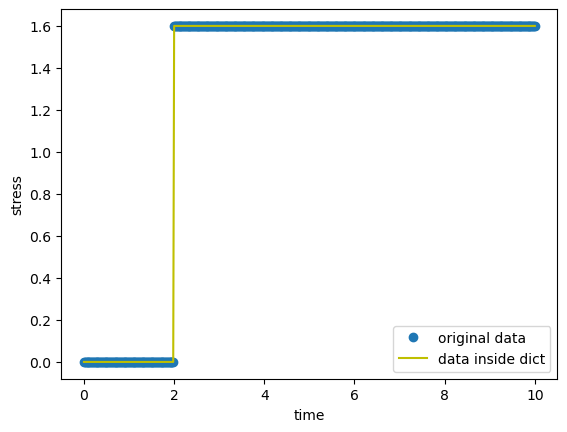

PyObject <matplotlib.legend.Legend object at 0x000000004A920760>

In [47]:
plot(data.t, data.σ, "o")
# plot(output["data"].t, output["data"].σ, "-y")
plot(output.data.t, output.data.σ, "-y")
xlabel("time")
ylabel("stress")
legend(["original data", "data inside dict"])

# Test decompose function for Maxwell

In [48]:
Maxwell_model=RheoModel(Maxwell, η=1, k=2)

datat=timeline(t_start=0, t_end=10.0, step=0.02);
# dstep=stressfunction(datat, hstep(offset=0.1, amp=0.9));
dstep = stressfunction(datat,hstep(offset=5.0,amp=5));

data=modelpredict(dstep, Maxwell_model);

In [49]:
output = decompose(Maxwell_model, data);
# keys(output)

[:η]Array{Symbol,1}[:k]Array{Symbol,1}

In [50]:
output

(data = , Dashpot = (data = ,), Spring = (data = ,))

t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	6.929483442079453e-15	0.0	2.3098278140264844e-15	6.929483442079453e-15	1.8478622512211875e-14	-4.619655628052969e-15	9.239311256105938e-15	6.929483442079453e-15	9.239311256105938e-15	-6.929483442079453e-15	...
σ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	9.239311256105938e-15	-2.3098278140264844e-15	4.619655628052969e-15	0.0	1.1549139070132422e-14	4.619655628052969e-15	4.619655628052969e-15	4.619655628052969e-15	9.239311256105938e-15	0.0	...
σ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	-4.3309271512996583e-16	1.4436423837665528e-16	2.8872847675331055e-16	1.010549668636587e-15	2.8872847675331055e-16	4.3309271512996583e-16	5.774569535066211e-16	-1.4436423837665528e-16	2.8872847675331055e-16	-2.8872847675331055e-16	...
σ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...


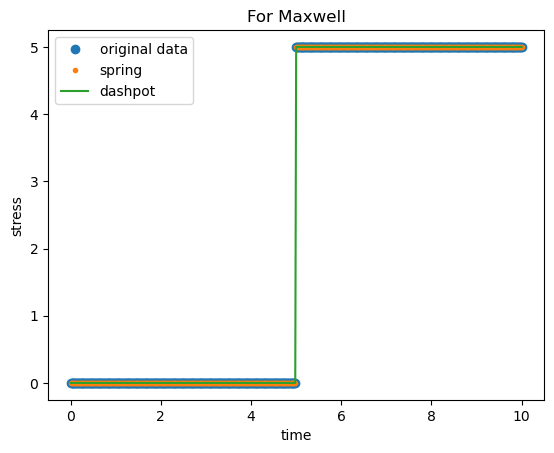

PyObject Text(0.5, 1.0, 'For Maxwell')

In [51]:
plot(data.t, data.σ, "o")
# plot(output["spring"]["data"].t, output["spring"]["data"].σ, ".") # Dict
# plot(output["dashpot"]["data"].t, output["dashpot"]["data"].σ) # Dict
plot(output.Spring.data.t, output.Spring.data.σ, ".")
plot(output.Dashpot.data.t, output.Dashpot.data.σ)
legend(["original data", "spring", "dashpot"])
xlabel("time")
ylabel("stress")
title("For Maxwell")

# Testing of BurgersLiquid model

In [67]:
BL_model=RheoModel(BurgersLiquid, η₁=1 , k₁=1, η₂=2, k₂=2)

datat=timeline(t_start=0, t_end=10.0, step=0.02);
# dstep=stressfunction(datat, hstep(offset=0.1, amp=0.9));
# dstep = stressfunction(datat,hstep(offset=5.0,amp=5));
dstep = strainfunction(datat,ramp(offset=2.0,gradient=0.8)) - strainfunction(datat,ramp(offset=5.0,gradient=0.8));

data=modelpredict(dstep, BL_model);

In [68]:
output = decompose(BL_model, data);
# keys(output)

[:η]Array{Symbol,1}[:k]Array{Symbol,1}[:η, :k]Array{Symbol,1}[:η]Array{Symbol,1}[:k]Array{Symbol,1}

In [69]:
output

(data = , Dashpot = (data = ,), Spring = (data = ,), KelvinVoigt = (data = , Dashpot = (data = ,), Spring = (data = ,)))

t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
σ =	0.0	1.804552979708191e-17	3.609105959416382e-17	3.609105959416382e-17	0.0	3.609105959416382e-17	0.0	-3.609105959416382e-17	1.804552979708191e-17	3.609105959416382e-17	...
t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	-4.3309271512996583e-16	-5.774569535066211e-16	-5.774569535066211e-16	-4.3309271512996583e-16	-8.661854302599317e-16	-1.010549668636587e-15	-8.661854302599317e-16	-1.010549668636587e-15	0.0	-7.218211918832764e-16	...
σ =	0.0	1.804552979708191e-17	3.609105959416382e-17	3.609105959416382e-17	0.0	3.609105959416382e-17	0.0	-3.609105959416382e-17	1.804552979708191e-17	3.609105959416382e-17	...
t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	1.1278456123176193e-17	-3.383536836952858e-17	-6.767073673905716e-18	1.3534147347811432e-17	1.1278456123176193e-17	3.8346750818799055e-17	-5.86479718405162e-17	-5.413658939124573e-17	6.541504551442192e-17	0.0	

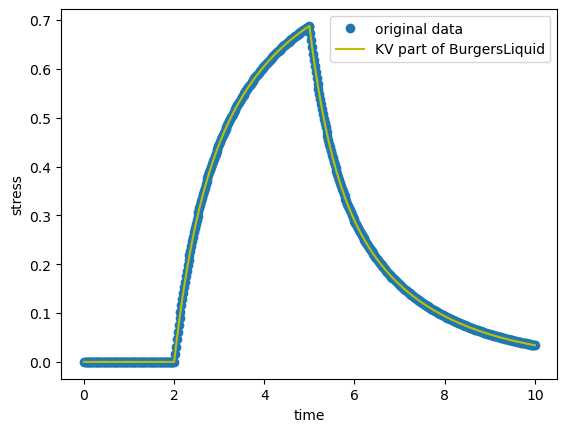

PyObject <matplotlib.legend.Legend object at 0x000000004A9E48B0>

In [70]:
plot(data.t, data.σ, "o")
# plot(output["KV"]["data"].t, output["KV"]["data"].σ, "-y")
plot(output.KelvinVoigt.data.t, output.KelvinVoigt.data.σ, "-y")
xlabel("time")
ylabel("stress")
legend(["original data", "KV part of BurgersLiquid"])

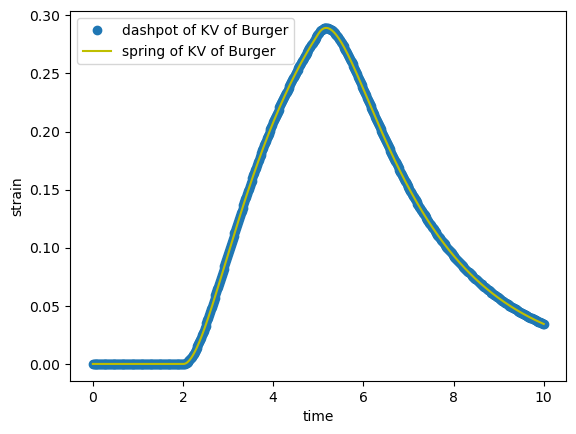

PyObject <matplotlib.legend.Legend object at 0x000000004AC1BA00>

In [72]:
plot(output.KelvinVoigt.Dashpot.data.t, output.KelvinVoigt.Dashpot.data.ϵ, "o")
plot(output.KelvinVoigt.Spring.data.t, output.KelvinVoigt.Spring.data.ϵ, "-y")
xlabel("time")
ylabel("strain")
legend(["dashpot of KV of Burger", "spring of KV of Burger"])

# Random work

In [ ]:
maxwell = RheoModel(Maxwell, k = 4, η = 5)
a = eval(maxwell.description.components[2]).params
typeof(a)

In [ ]:
maxwell.params[1]

In [ ]:
b = maxwell.params

In [ ]:
[i for i in maxwell.params]

In [ ]:
a

In [ ]:
a = [4,5,6]

In [ ]:
popfirst!(a)

In [ ]:
a

In [ ]:
c = NamedTuple{(:a,)}((NamedTuple{(:a, :b)}((1,"")),))

In [ ]:
typeof(c)

In [ ]:
NamedTuple{(:a,:a)}((1,2))

In [ ]:
list = [:a,:b,:c]

In [ ]:
typeof(Tuple(list))

In [ ]:
pushfirst!([:Maxwell, :Spring], :data)

In [ ]:
comp = collect((:Maxwell, :Spring))

In [ ]:
for c in comp
    if c==:Maxwell
        print(c)
    end
    print(typeof(c))
end

In [ ]:
values = []

In [ ]:
component1=(:Maxwell, (:η, :kᵦ,))

In [ ]:
component1.Maxwell

In [ ]:
c = collect( (:data,(:Dashpot, (:η,)), (:Spring, (:k,))) )

In [ ]:
c[1] == :data

In [ ]:
a = (5 +
,6 +
,7)

In [ ]:
a

In [52]:
params = [:η]

1-element Array{Symbol,1}:
 :η

In [62]:
values = (η=5)

5

In [59]:
values[:η]

5

In [65]:
:η=>5

:η => 5

In [60]:
pval = Vector{Float64}()

Float64[]

In [66]:
append!(pval, values[:η])

LoadError: MethodError: no method matching getindex(::Int64, ::Symbol)
Closest candidates are:
  getindex(::Number) at number.jl:75
  getindex(::Number, !Matched::Integer) at number.jl:76
  getindex(::Number, !Matched::Integer...) at number.jl:81
  ...